# Problem Statement
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(250)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline


In [2]:
df = pd.read_csv('50_Startups (1).csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
df = pd.get_dummies(df, columns=['State'])

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
df=df.rename(columns={'R&D Spend':'RnD_spend',
                      'Marketing Spend':'marketing_spend',
                     'State_New York':'State_new_york'})

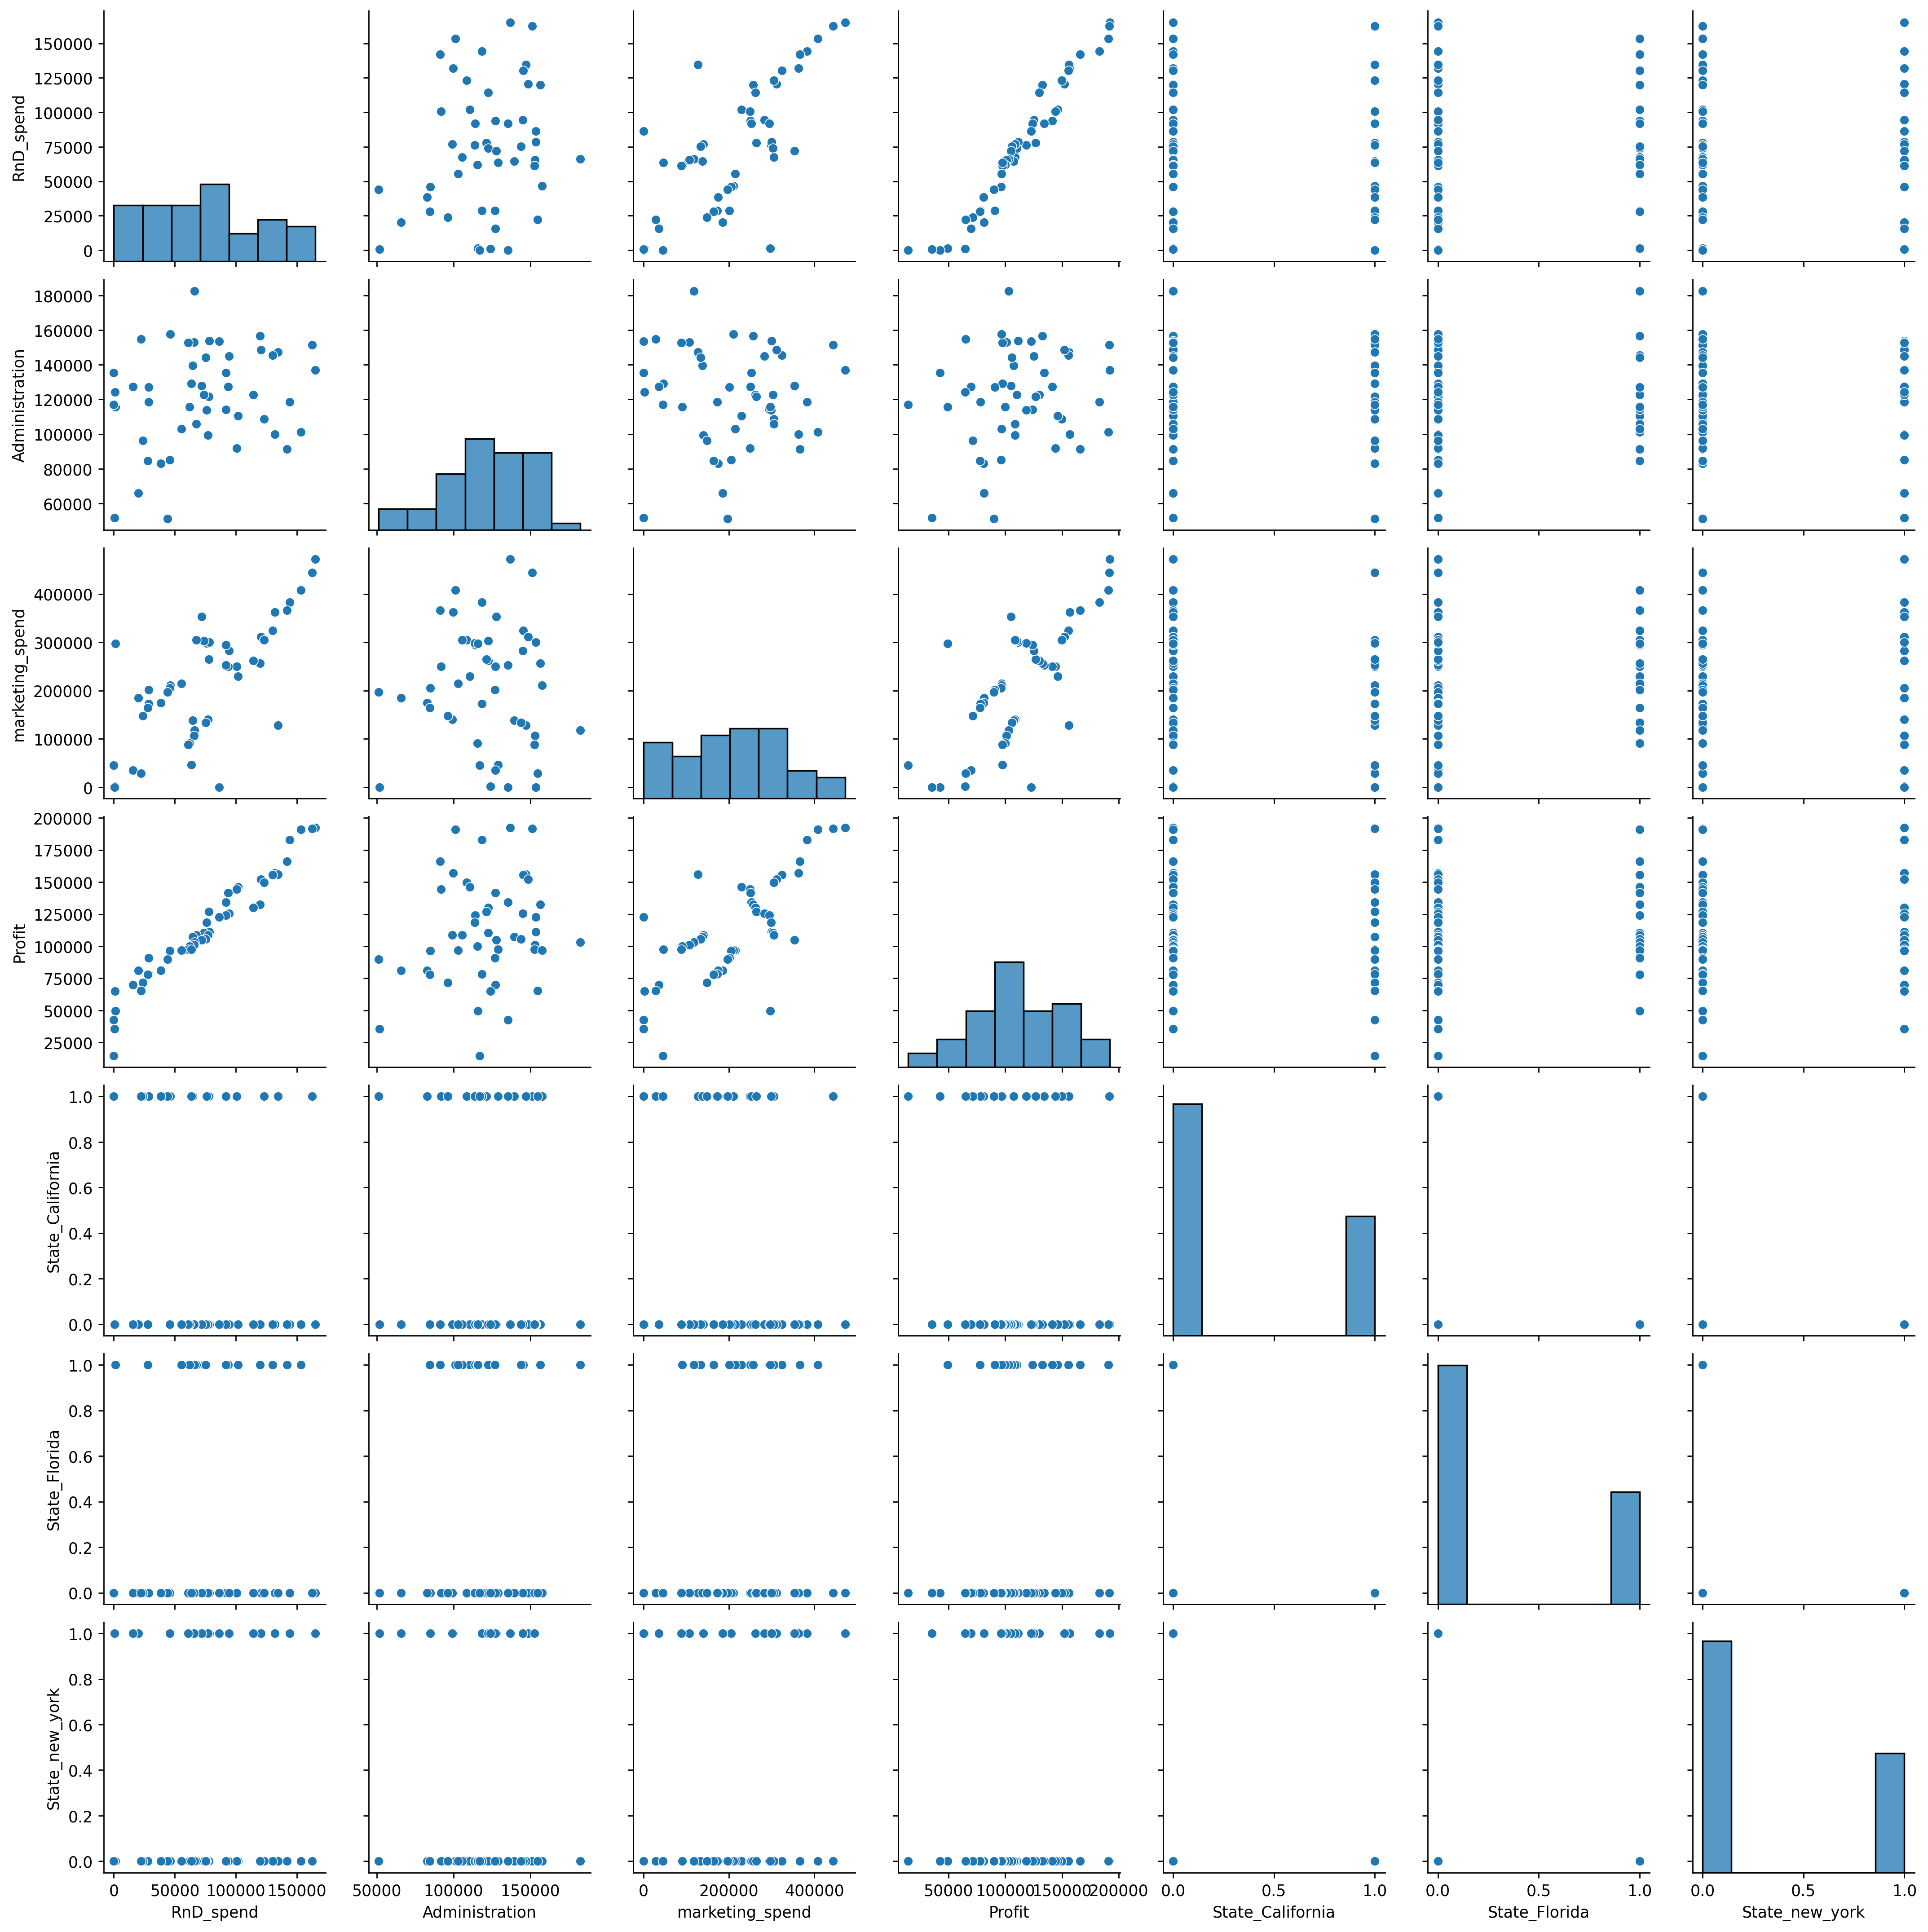

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,RnD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_new_york
RnD_spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
marketing_spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_new_york,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

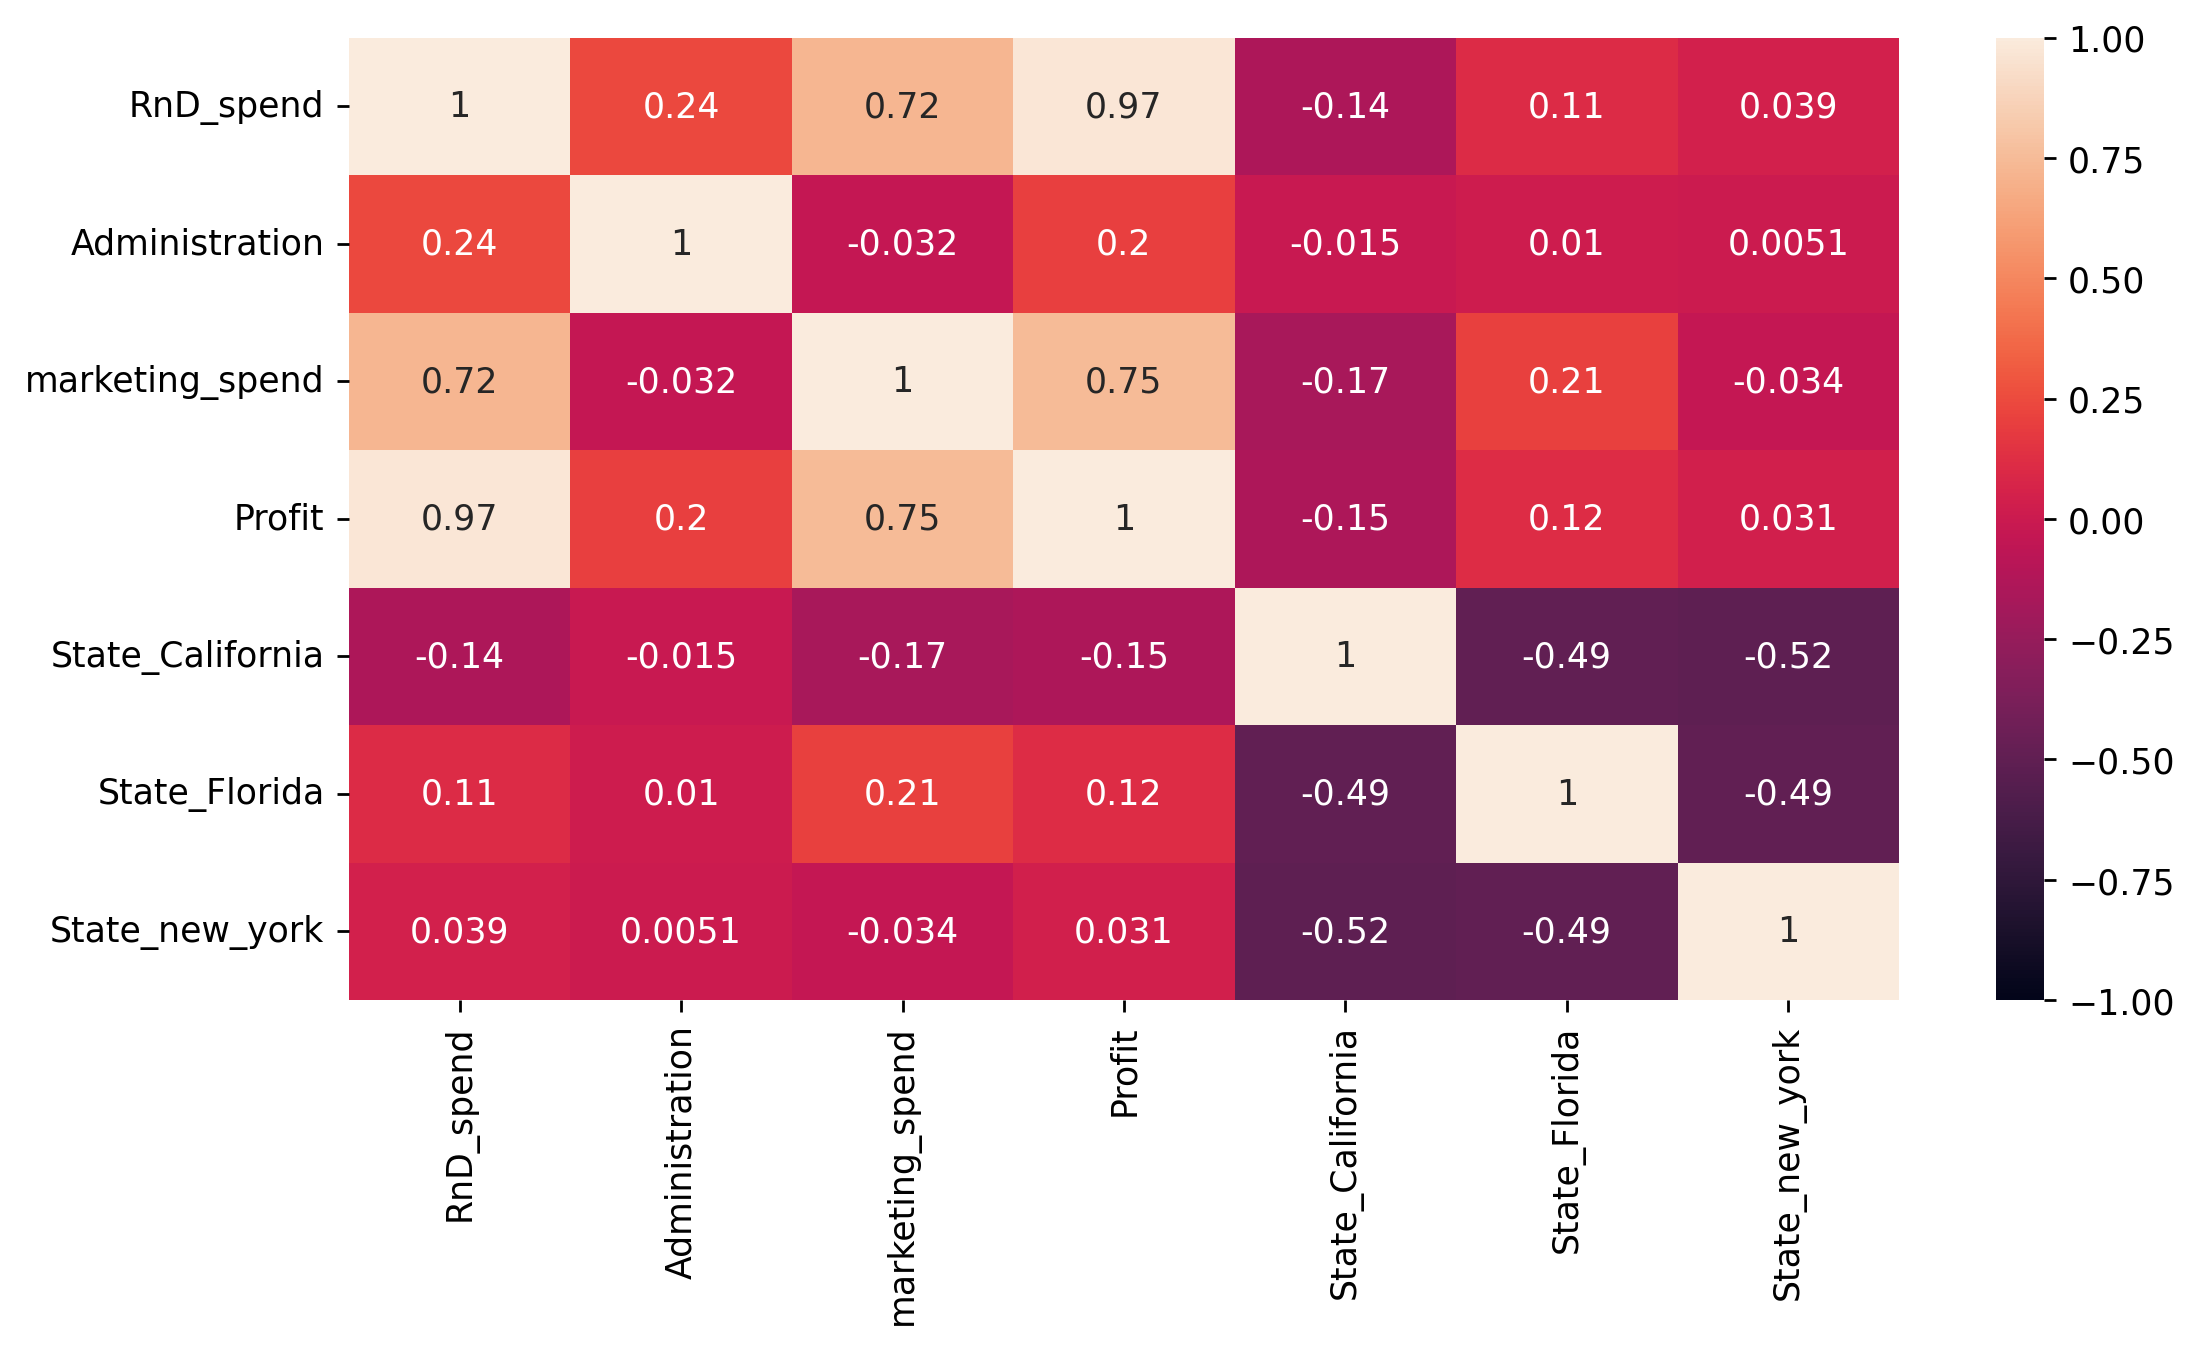

In [13]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

- Heatmap shows the correlation between independent columns and dependent column,rnd_spend and marketing spend shows the 72 of correlation.

# Scaling of Data

In [14]:
mm = MinMaxScaler()
df[['RnD_spend','Administration','marketing_spend','Profit','State_California','State_Florida','State_new_york']]= mm.fit_transform(df)

# Splitting Data

In [15]:
x = df.drop(columns=['Profit'],axis=1)
y = df['Profit']

In [16]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(x)

In [18]:
ytrainpredict = lr.predict(xtrain)
ytestpredict = lr.predict(xtest)

In [19]:
r2scoretrain = r2_score(ytrain,ytrainpredict)
r2scoretrain

0.9419546147365754

In [20]:
r2scoretest = r2_score(ytest,ytestpredict)
r2scoretest

0.9614855512863174

In [21]:
lr.score(xtrain,ytrain),lr.score(xtest,ytest)

(0.9419546147365754, 0.9614855512863174)

In [22]:
msetrain = mean_squared_error(ytrain,ytrainpredict)
msetest = mean_squared_error(ytest,ytestpredict)

In [23]:
print("mean Squared error of train:",msetrain)
print("mean Squared error of test:",msetest)

mean Squared error of train: 0.0026923413823704088
mean Squared error of test: 0.00218080428330101


## Before Scaling the data
- Mean Squared Error before scaling,for training 84902471.57619481 and for testing 68771246.79901865 R_squared value of training 0.9419546147365754 and testing0.9614855512867336

## After Scaling of data

- Mean Squared Error before scaling,for training 0.0026923413823704088 and for testing 0.00218080428330101. R_squared value of training 0.9419546147365754 and testing0.9614855512867336, here models follows the assumption all the error value mean is 0.